In [74]:
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

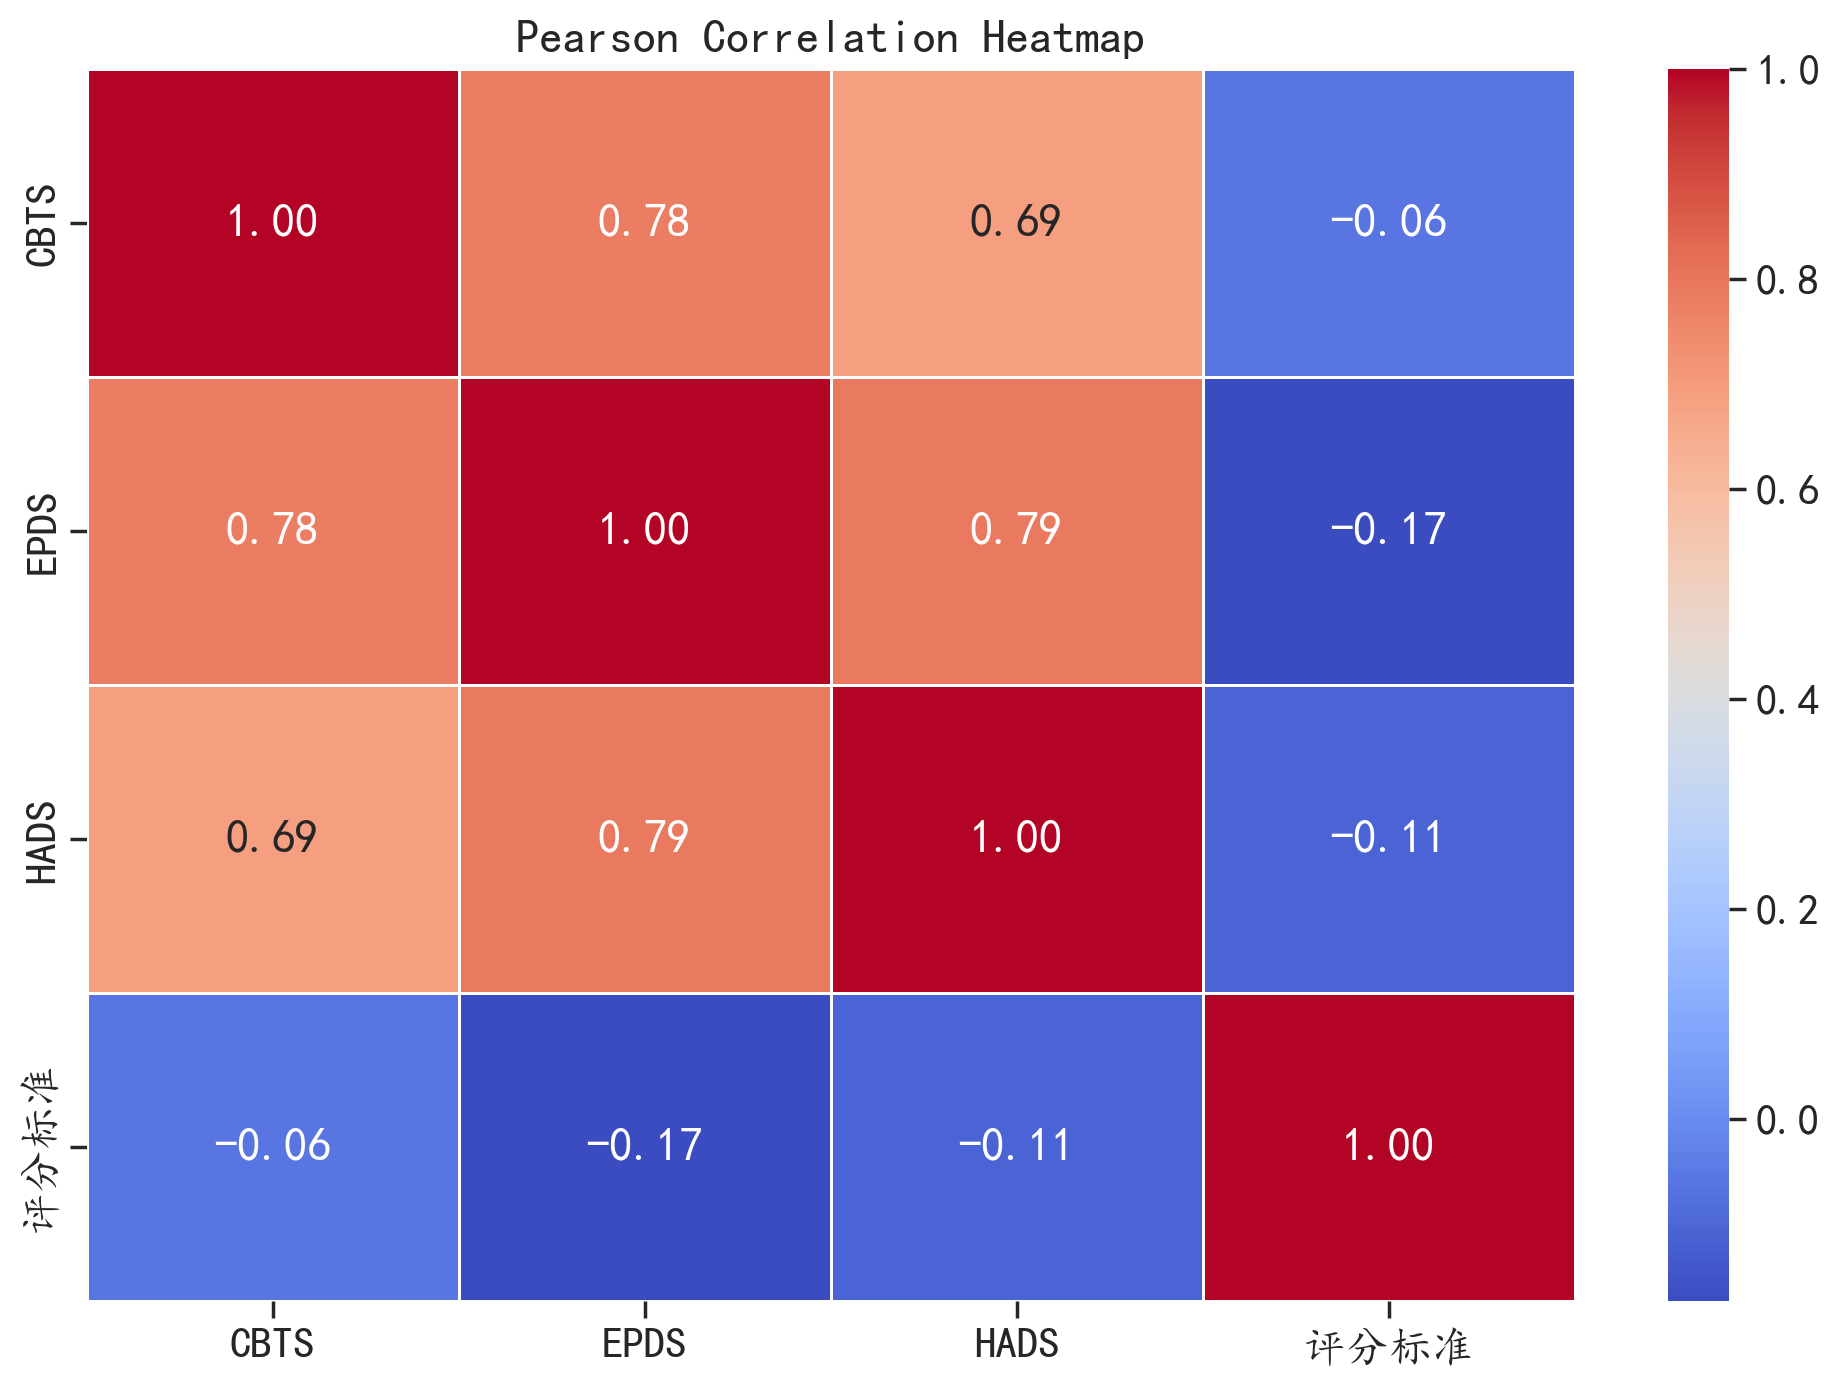

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('data2.csv')

# 进行Pearson相关性分析
correlation_matrix = data.corr(method='pearson')

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

图可知，CBTS负相关并很不显著

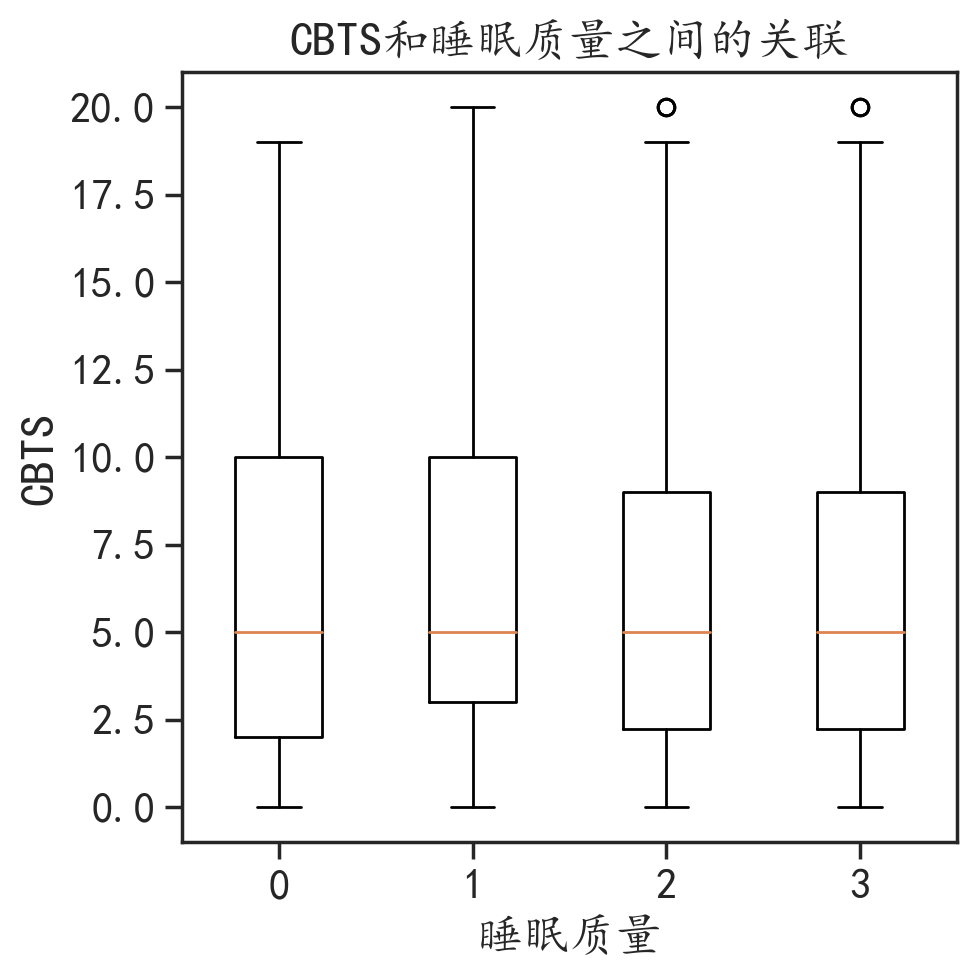

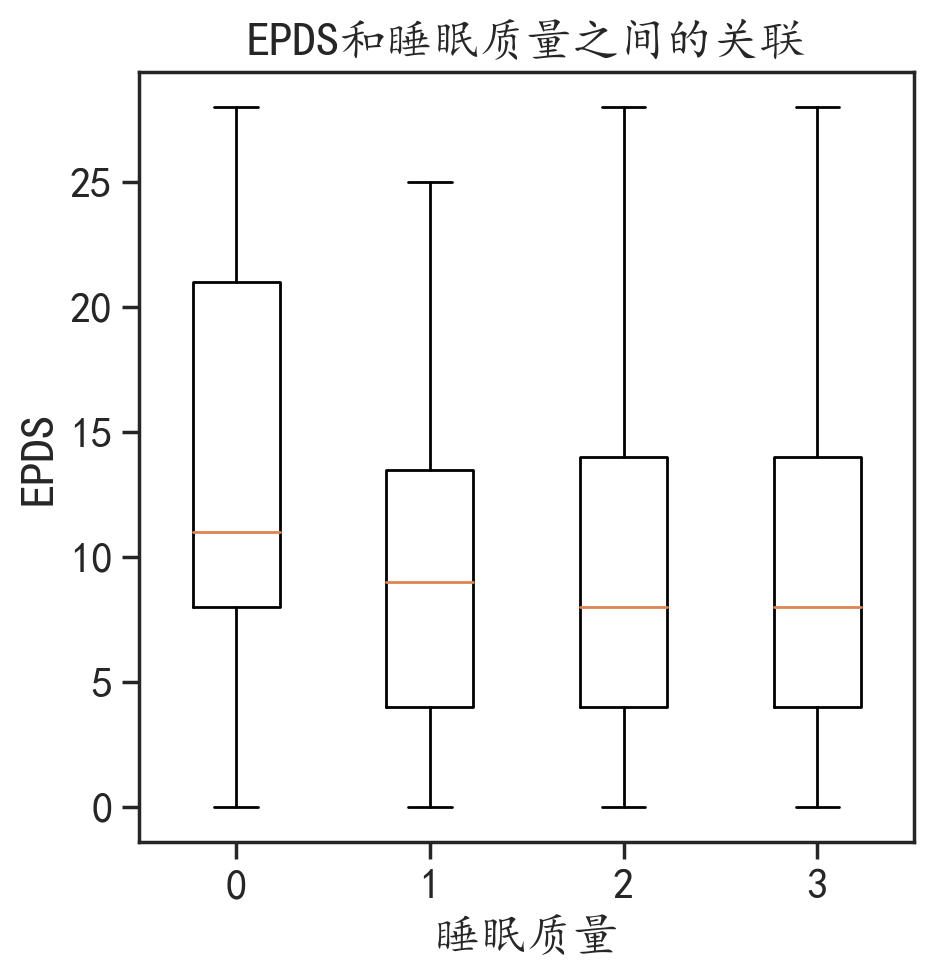

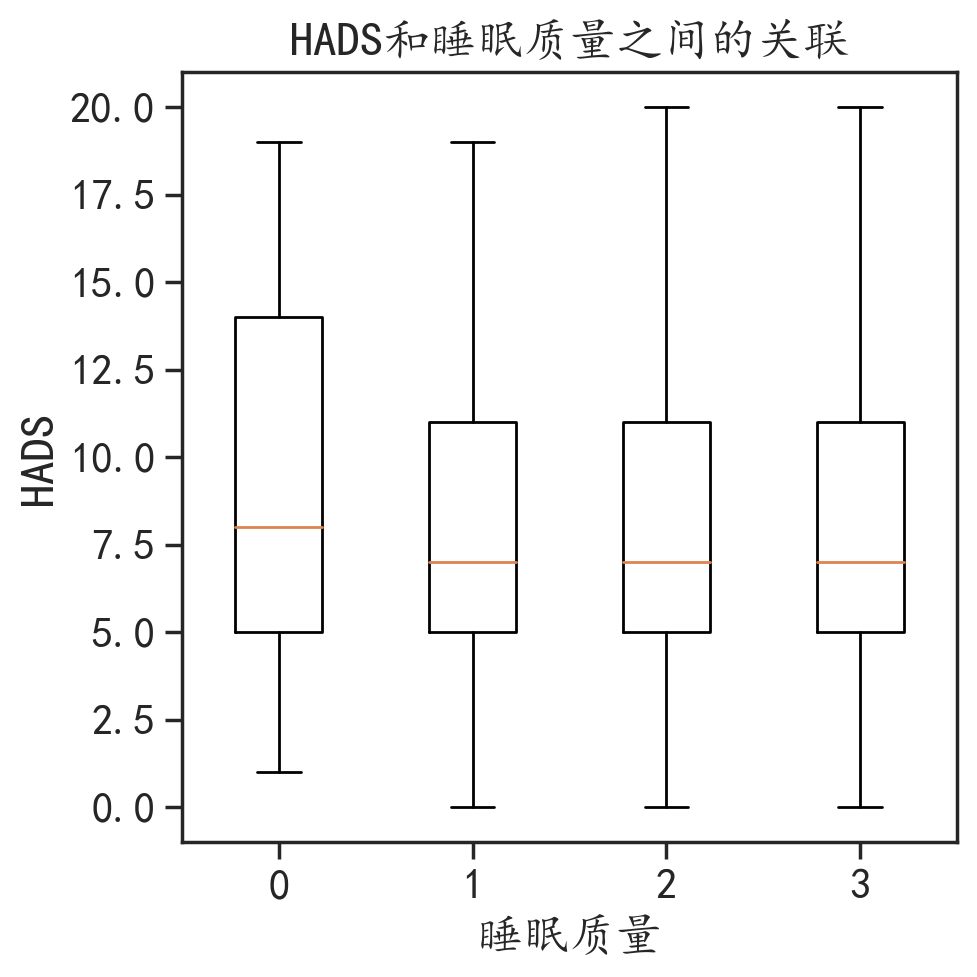

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def caseplot(name):
    # 读取数据
    data = pd.read_csv('data.csv')
    plt.figure(figsize=(5, 5))
    # 绘制箱线图
    plt.boxplot([data[data['睡眠质量'] == 0][name],
                data[data['睡眠质量'] == 1][name],
                data[data['睡眠质量'] == 2][name],
                data[data['睡眠质量'] == 2][name]],
                labels=['0', '1', '2','3'])
    plt.xlabel('睡眠质量')
    plt.ylabel(name)
    plt.title(f'{name}和睡眠质量之间的关联')
    plt.show()
caseplot('CBTS')
caseplot('EPDS')
caseplot('HADS')


In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# 从CSV文件读取数据
data = pd.read_csv('data.csv')

# 分离自变量和因变量
X = data[['CBTS', 'EPDS', 'HADS']].values
y = data['评分标准'].values

# 计算自变量的均值和标准差
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# 对自变量进行标准化处理
X_normalized = (X - mean_X) / std_X

# 使用偏最小二乘-判别分析建立模型
pls_model = PLSRegression(n_components=2)  # 这里选择2个主成分，也可以根据需要调整
pls_model.fit(X_normalized, y)

# 查看模型的系数
print("回归系数:")
print(pls_model.coef_)

# 查看模型的截距
print("截距:")
print(pls_model.intercept_)

# Evaluate the model using R-squared and RMSE
y_pred = pls_model.predict(X_normalized)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

# Perform permutation testing
def calc_test_statistic(y_true, y_pred):
    return r2_score(y_true, y_pred)

def permutation_test(X, y, model, num_permutations=1000):
    np.random.seed(42)  # For reproducibility
    test_stat_observed = calc_test_statistic(y, model.predict(X))
    test_stats_permutations = []

    for _ in range(num_permutations):
        y_permuted = np.random.permutation(y)
        model.fit(X, y_permuted)
        y_pred_permuted = model.predict(X)
        test_stat_permuted = calc_test_statistic(y_permuted, y_pred_permuted)
        test_stats_permutations.append(test_stat_permuted)

    p_value = (np.sum(test_stats_permutations >= test_stat_observed) + 1) / (num_permutations + 1)
    return p_value

p_value = permutation_test(X_normalized, y, pls_model)
print("P-value:", p_value)


回归系数:
[[ 0.33810148]
 [-0.54102068]
 [-0.01006329]]
截距:
[6.19028947]
R-squared: 0.04360005954115442
MSE: 2.728142075806079
RMSE: 1.65170883505722


d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


P-value: 0.000999000999000999


In [29]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 从CSV文件读取数据
data = pd.read_csv('data.csv')

# 分离自变量和因变量
X = data[['CBTS', 'EPDS', 'HADS']].values
y = data['评分标准'].values

# 计算自变量的均值和标准差
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# 对自变量进行标准化处理
X_normalized = (X - mean_X) / std_X

# 使用偏最小二乘-判别分析建立模型
pls_model = PLSRegression(n_components=2)  # 这里选择2个主成分，也可以根据需要调整
pls_model.fit(X_normalized, y)

# 查看模型的系数
print("回归系数:")
print(pls_model.coef_)

# 查看模型的截距
print("截距:")
print(pls_model.intercept_)


回归系数:
[[ 0.33810148]
 [-0.54102068]
 [-0.01006329]]
截距:
[6.19028947]


d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


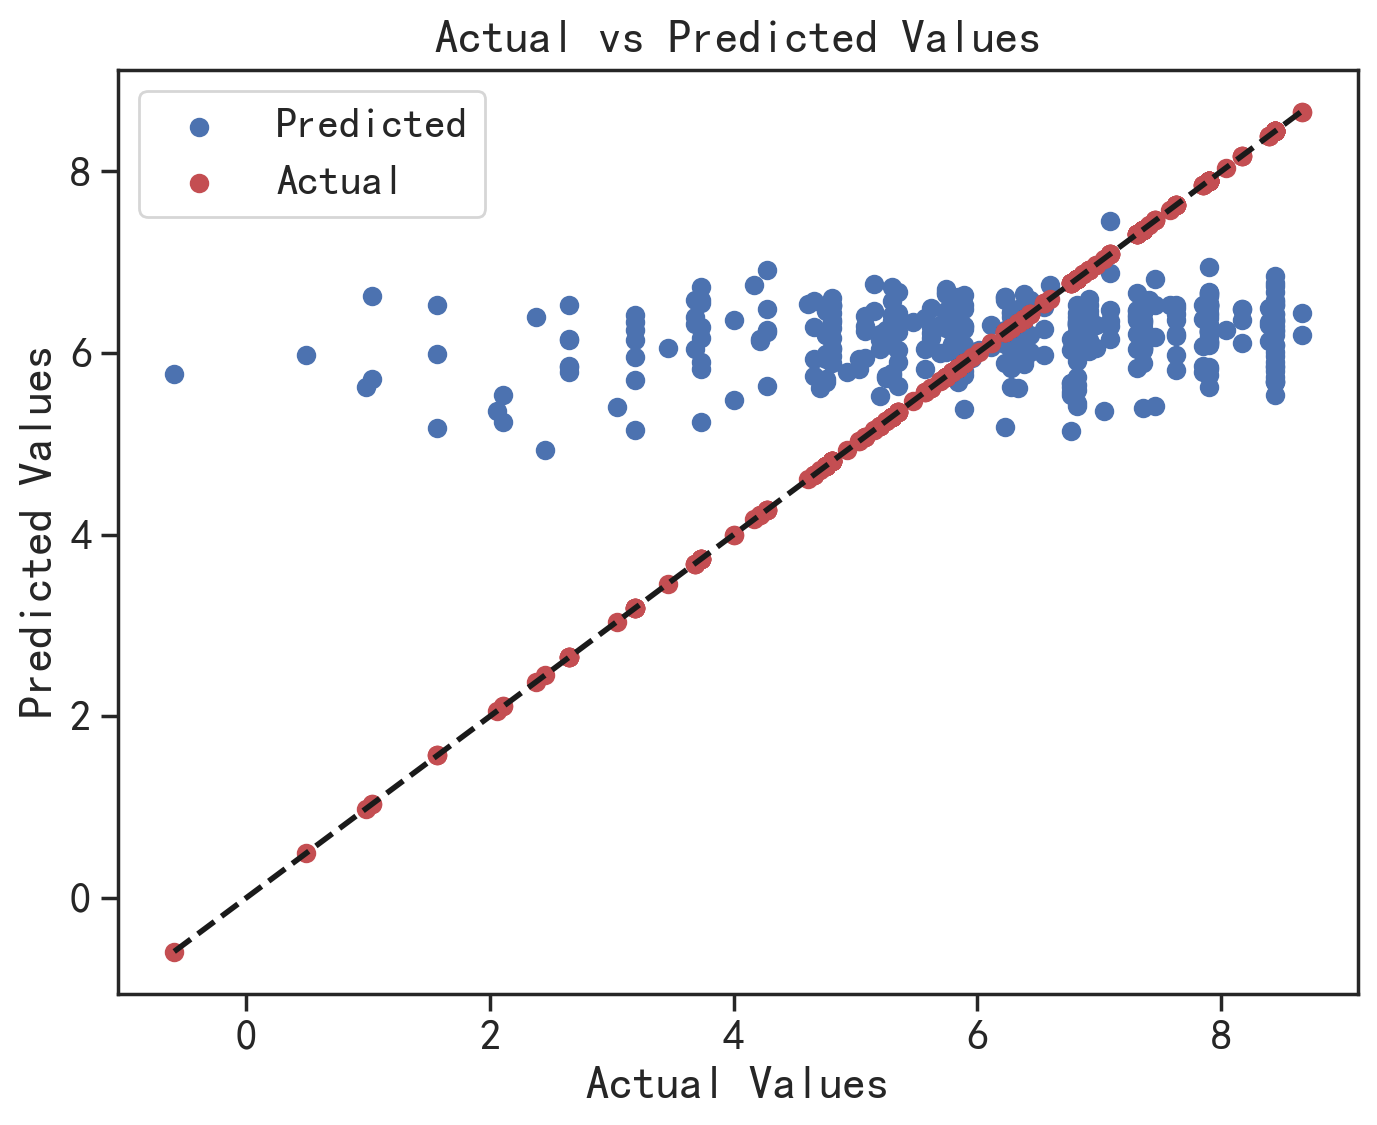

In [76]:
import matplotlib.pyplot as plt

# Get the predicted values from the PLSRegression model
predicted_values = pls_model.predict(X_normalized)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, c='b', label='Predicted')
plt.scatter(y, y, c='r', label='Actual')  # Add actual values with a different color
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


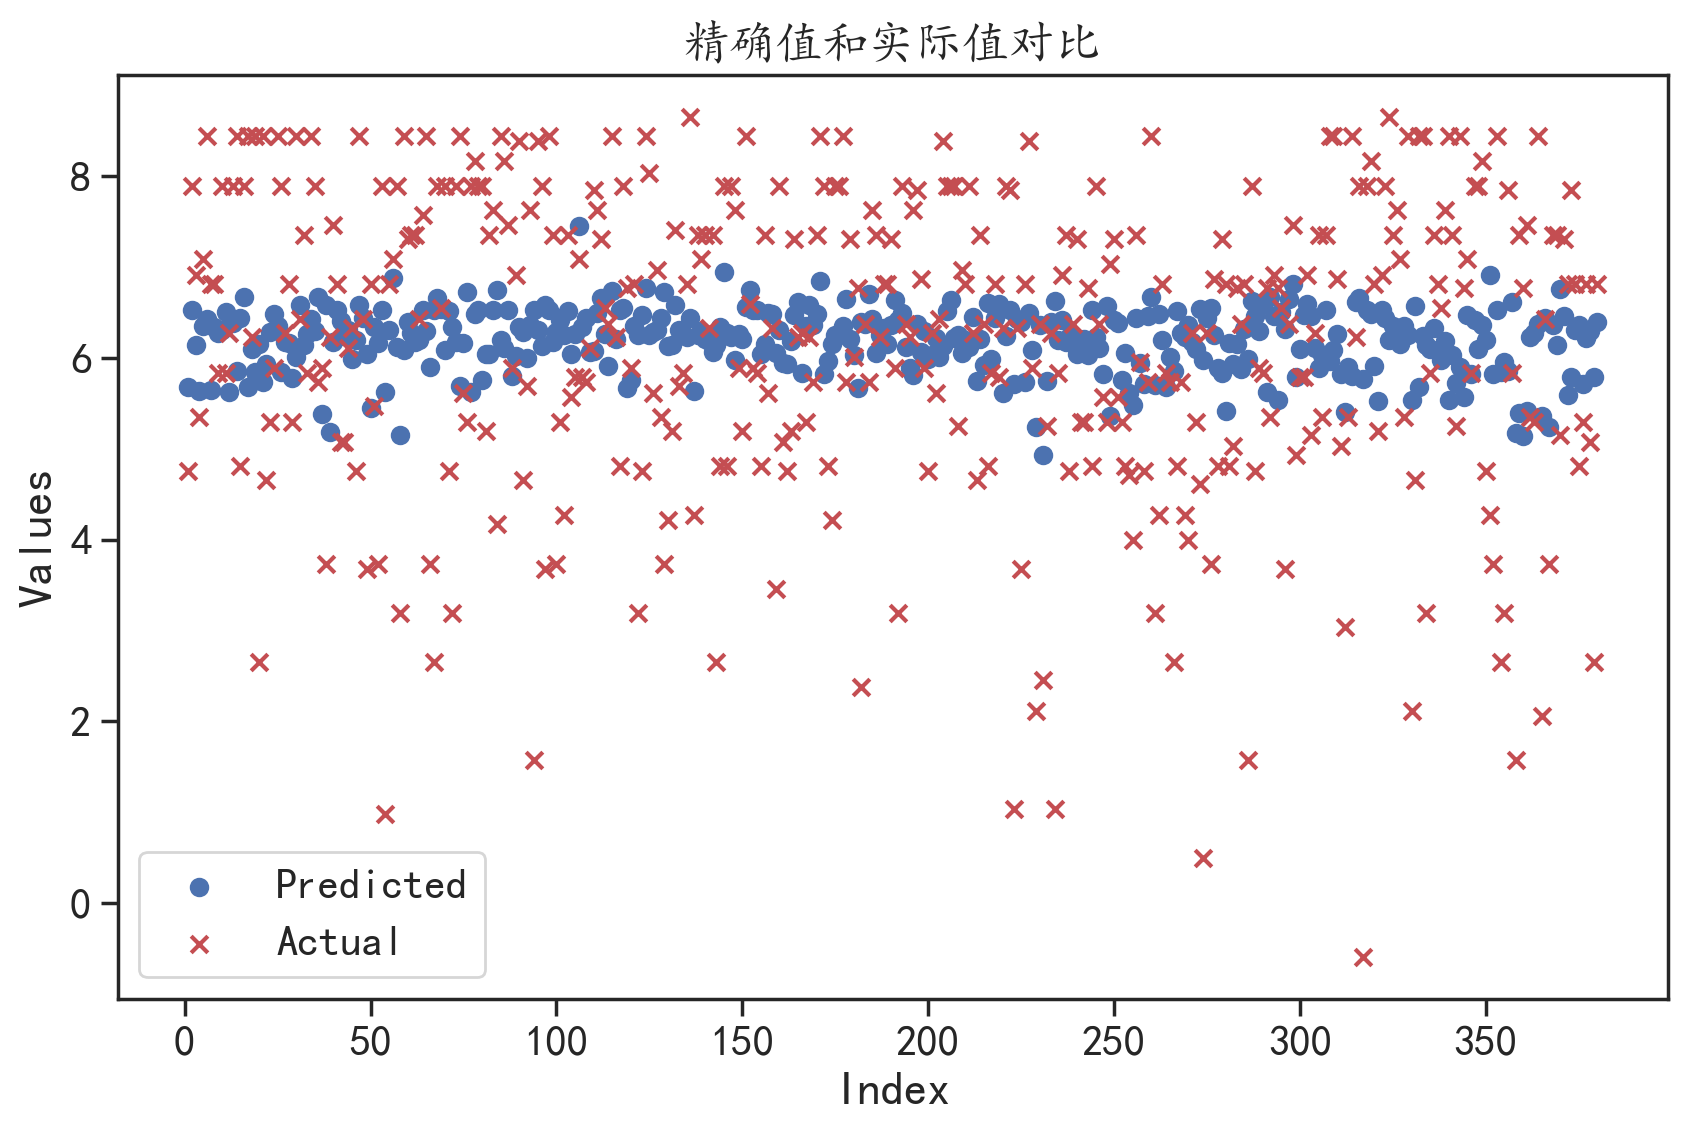

In [80]:
import matplotlib.pyplot as plt

# Get the predicted values from the PLSRegression model
predicted_values = pls_model.predict(X_normalized)

# Create an array of indices (assuming 'data.csv' contains an 'ID' column)
indices = data['编号'].values

# Create a scatter plot of actual and predicted values with different colors
plt.figure(figsize=(10, 6))
plt.scatter(indices, predicted_values, c='b', label='Predicted', marker='o')
plt.scatter(indices, y, c='r', label='Actual', marker='x')  # Add actual values with a different color
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('精确值和实际值对比')
plt.legend()
plt.show()


In [72]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 从CSV文件读取数据
data = pd.read_csv('data.csv')

# 分离自变量和因变量
X = data[['CBTS', 'EPDS', 'HADS']].values
y = data['评分标准'].values

# 计算自变量的均值和标准差
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# 对自变量进行标准化处理
X_normalized = (X - mean_X) / std_X

# 使用偏最小二乘-判别分析建立模型
pls_model = PLSRegression(n_components=2)  # 这里选择2个主成分，也可以根据需要调整
pls_model.fit(X_normalized, y)

# 查看模型的系数
print("回归系数:")
print(pls_model.coef_)

# 查看模型的截距
print("截距:")
print(pls_model.intercept_)


回归系数:
[[ 0.33810148]
 [-0.54102068]
 [-0.01006329]]
截距:
[6.19028947]


d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


公式就出来了

经查找，那个要治疗的人的睡眠评分标准是5.25	睡眠质量是1，说明是中等
现在目标是将中等到优秀
根据第四题的分析，优秀是7.885748

In [3]:
import pulp

# 创建线性规划问题
lp_problem = pulp.LpProblem("Minimize_w", pulp.LpMinimize)

# 定义决策变量
x1 = pulp.LpVariable("x1", 0, 30, cat='Integer')
x2 = pulp.LpVariable("x2", 0, 30, cat='Integer')
x3 = pulp.LpVariable("x3", 0, 30, cat='Integer')
xC = pulp.LpVariable("xC", 0, 15, cat='Integer')
xE = pulp.LpVariable("xE", 0, 22, cat='Integer')
xH = pulp.LpVariable("xH", 0, 18, cat='Integer')

y1 = 870.67 * x1 + 200
y2 = 690 * x2 + 500
y3 = 2440 * x3 + 300
y =  0.33810148 * xC  -0.54102068 * xE  -0.01006329 * xH + 6.19028947
# c,e,h和睡眠评分标准的映射

# 定义目标函数
lp_problem += y1 + y2 + y3, "Minimize_w"

# 定义约束条件
lp_problem += y >= 7.885748
lp_problem += x1 == 15 - xC
lp_problem += x2 == 22 - xE
lp_problem += x3 == 18 - xH

# 求解问题
lp_problem.solve()

# 输出结果
print("最小值w的取值为:", pulp.value(lp_problem.objective))
print("x1的取值为:", pulp.value(x1))
print("x2的取值为:", pulp.value(x2))
print("x3的取值为:", pulp.value(x3))

最小值w的取值为: 12730.0
x1的取值为: 0.0
x2的取值为: 17.0
x3的取值为: 0.0


In [6]:
import cvxpy as cp

# Define variables
x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()


objective_function = cp.Minimize(200 * cp.exp(0.88 * 15) - 200 * cp.exp(0.88 * x1) +
                                 500 * cp.exp(0.66 * 22) - 500 * cp.exp(0.66 * x2) +
                                 300 * cp.exp(0.75 * 18) - 300 * cp.exp(0.75 * x3))

objective_function = cp.Minimize(200 * cp.exp(0.88 * (15 - x1)) +
                                 500 * cp.exp(0.66 * (22 - x2)) +
                                 300 * cp.exp(0.75 * (18 - x3)))

# Define the constraints
constraints = [0.34 * x1 - 0.54 * x2 - 0.01 * x3 + 6.2 >= 7.8,
               x1 >= 0, x1 <= 15,
               x2 >= 0, x2 <= 22,
               x3 >= 0, x3 <= 18]

# Create the problem and solve
problem = cp.Problem(objective_function, constraints)
result = problem.solve()

# Output results
print("Optimal value of x1:", x1.value)
print("Optimal value of x2:", x2.value)
print("Optimal value of x3:", x3.value)
print("Optimal value of the objective function:", result)


Optimal value of x1: 14.999999892084244
Optimal value of x2: 6.314723038593956
Optimal value of x3: 9.004945805976625
Optimal value of the objective function: 15919707.85253347
